In [2]:
suppressPackageStartupMessages(library('tidyverse'))
# suppressPackageStartupMessages(library('tidylog'))

# Mostra valores sem notação científica
options(scipen=999)

library('sf')
library('raster')

options(repr.matrix.max.cols=150) # repr.matrix.max.rows=100

Linking to GEOS 3.9.1, GDAL 3.2.2, PROJ 8.0.0

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
# # Gravar todos os shapes dos municípios em gpkg
# open_path <- '../../../indice-mobilidade_dados/01_municipios/2019'
# for (f in list.files(open_path)){
#     open_file <- sprintf('%s/%s', open_path, f)
#     out_file <- sprintf('%s.gpkg', open_file)
#     municipios <- read_rds(open_file)
#     st_write(municipios, out_file, driver = 'GPKG', append = FALSE)
# }

# 01_municipios

[1] 1 2

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,code_state,geometry
,<dbl>,<POLYGON [°]>
1,35,POLYGON ((-46.63386 -23.429...


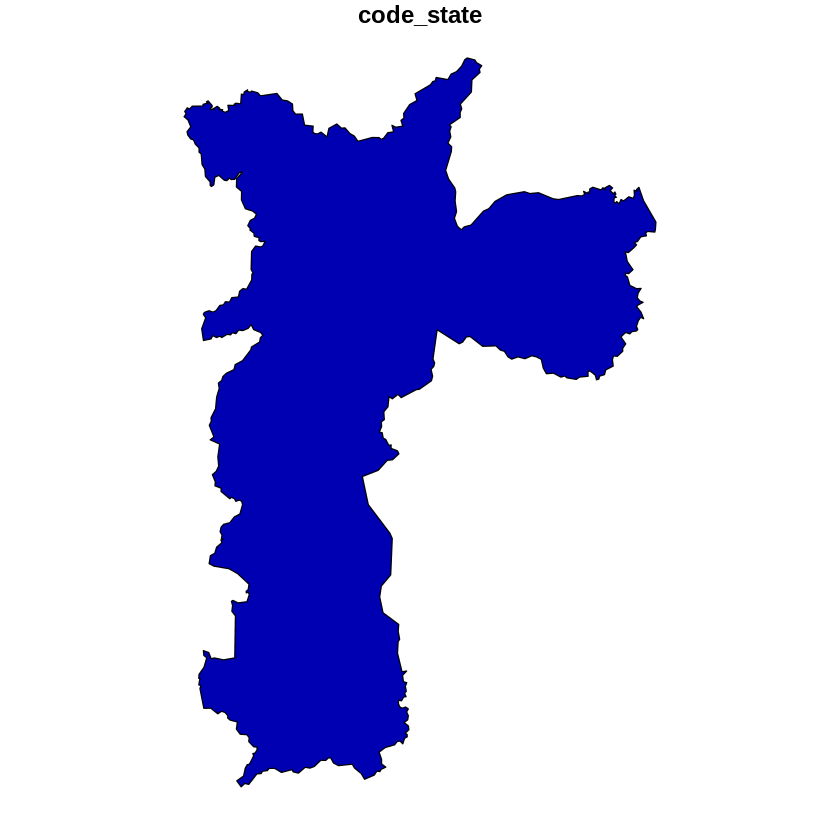

In [2]:
# 'Municípios' são os shapes de cada município
open_file <- '../../../indice-mobilidade_dados/01_municipios/2019/municipio_spo_2019.rds'
municipios <- read_rds(open_file)

dim(municipios)
head(municipios)
plot(municipios)

# 02_setores_censitarios

In [4]:
# 'Setores censitários' são os shapes dos setores cada município,
# com informações sobre limites administrativos
open_file <- '../../../indice-mobilidade_dados/02_setores_censitarios/2019/setores_spo_2019.rds'
set_censitarios <- read_rds(open_file)

# # Transforma projeção para WGS84
# set_censitarios <- set_censitarios %>% st_transform(31983) 

dim(set_censitarios)
head(set_censitarios)

[1] 18953    12

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<MULTIPOLYGON [°]>
1,355030804000079,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51778 -...
2,355030804000080,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51888 -...
3,355030804000081,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52015 -...
4,355030804000082,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5214 -2...
5,355030804000083,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52371 -...
6,355030804000084,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5276 -2...


# 03_grade_municipios

In [8]:
open_file <- '../../../indice-mobilidade_dados/03_grade_municipios/2019/grade_spo_2019.rds'
grade_municipios <- read_rds(open_file)

dim(grade_municipios)
head(grade_municipios)

[1] 30896    14

,ID_UNICO,nome_1KM,nome_5KM,nome_10KM,nome_50KM,nome_100KM,nome_500KM,QUADRANTE,MASC,FEM,POP,DOM_OCU,code_state,geom
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<MULTIPOLYGON [°]>
1,200ME57368N86596,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81098 -...
2,200ME57368N86598,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81103 -...
3,200ME57368N86600,1KME5736N8659,5KME5735N8655,10KME5730N8650,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81108 -...
4,200ME57368N86602,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81113 -...
5,200ME57368N86604,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81118 -...
6,200ME57368N86606,1KME5736N8660,5KME5735N8660,10KME5730N8660,50KME5700N8650,100KME5700N8650,500KME5300N8350,ID_25,0,0,0,0,35,MULTIPOLYGON (((-46.81123 -...


In [23]:
 sum(grade_municipios$POP, na.rm = TRUE)

[1] 11179171

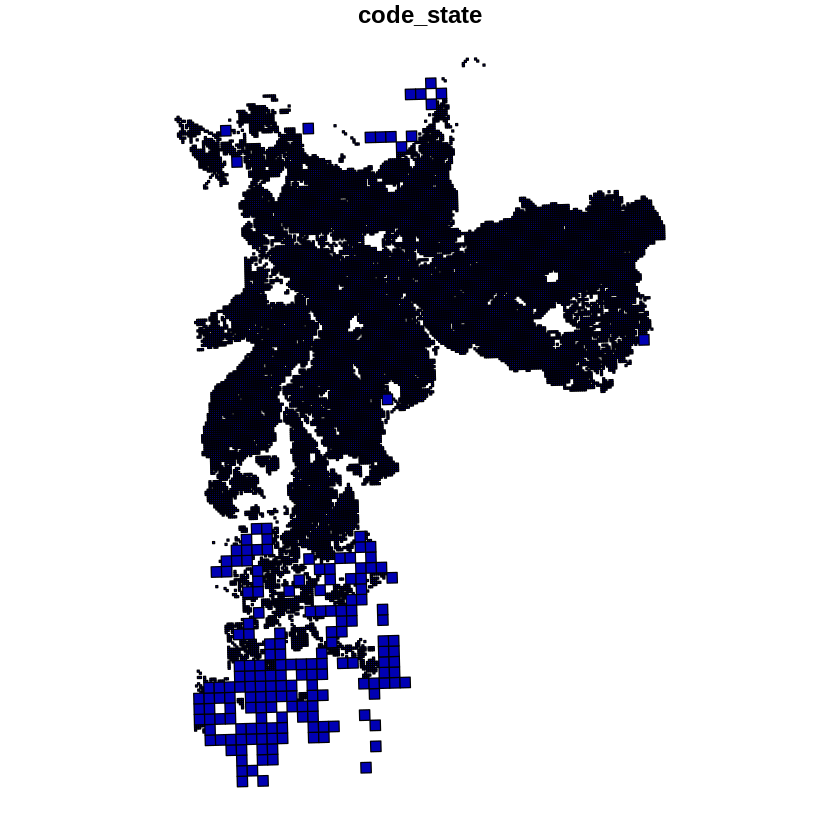

In [12]:
grade_municipios %>% filter(POP > 0) %>% dplyr::select(code_state) %>% plot()

In [13]:
open_file <- '../../../indice-mobilidade_dados/03_grade_municipios/2019/grade_oco_2019.rds'
grade_municipios <- read_rds(open_file) %>% filter(POP > 0)

dim(grade_municipios)
sum(grade_municipios$POP, na.rm = TRUE)

[1] 1390   14

[1] 669766

# 04_setores_agregados

In [5]:
open_file <- '../../../indice-mobilidade_dados/04_setores_agregados/2019/setores_agregados_oco_2019.rds'
setores_agregados <- read_rds(open_file)

dim(setores_agregados)
head(setores_agregados)

[1] 943  34

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,cod_uf,cod_muni,renda_total,moradores_total,renda_per_capita,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2,cor_branca,cor_preta,cor_amarela,cor_parda,cor_indigena,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,353440105000258,URBANO,3534401,Osasco,Cipava,353440105006,35344010500,NA,353440105,Osasco,35,SP,3534401,843324,912,924.6974,68,64,248,264,268,622,77,16,189,8,30,100,60,91,205,370,56,MULTIPOLYGON (((-46.79077 -...
2,353440105000259,URBANO,3534401,Osasco,Vila Yolanda,353440105007,35344010500,NA,353440105,Osasco,35,SP,3534401,286312,449,637.6659,22,51,168,142,66,260,30,0,159,0,31,51,23,59,110,147,28,MULTIPOLYGON (((-46.79279 -...
3,353440105000260,URBANO,3534401,Osasco,Santo Antônio,353440105031,35344010500,NA,353440105,Osasco,35,SP,3534401,291862,469,622.3070,9,86,137,168,69,362,9,0,98,0,38,57,33,47,124,146,24,MULTIPOLYGON (((-46.79543 -...
4,353440105000261,URBANO,3534401,Osasco,Jardim Roberto,353440105020,35344010500,NA,353440105,Osasco,35,SP,3534401,461080,1018,452.9273,153,224,356,199,86,506,64,4,444,0,78,149,89,124,232,317,29,MULTIPOLYGON (((-46.80152 -...
5,353440105000262,URBANO,3534401,Osasco,Jardim Roberto,353440105020,35344010500,NA,353440105,Osasco,35,SP,3534401,405215,629,644.2210,60,100,165,213,91,335,84,8,202,0,41,81,45,79,158,201,24,MULTIPOLYGON (((-46.80502 -...
6,353440105000263,URBANO,3534401,Osasco,Jardim Roberto,353440105020,35344010500,NA,353440105,Osasco,35,SP,3534401,507775,1034,491.0783,105,162,408,272,87,675,118,3,238,0,87,141,67,130,257,312,40,MULTIPOLYGON (((-46.80624 -...


In [18]:
 sum(setores_agregados$moradores_total, na.rm = TRUE)

[1] 663456

In [19]:
open_file <- '../../../indice-mobilidade_dados/04_setores_agregados/2019/setores_agregados_spo_2019.rds'
setores_agregados <- read_rds(open_file)

dim(setores_agregados)
head(setores_agregados)

[1] 18953    34

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,cod_uf,cod_muni,renda_total,moradores_total,renda_per_capita,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2,cor_branca,cor_preta,cor_amarela,cor_parda,cor_indigena,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,355030804000079,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,432103,554,779.9693,5,51,184,211,103,458,26,3,67,0,31,59,30,41,133,215,45,MULTIPOLYGON (((-46.51778 -...
2,355030804000080,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,449239,713,630.0687,22,85,271,258,77,517,37,20,139,0,41,94,35,71,186,223,63,MULTIPOLYGON (((-46.51888 -...
3,355030804000081,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,411373,685,600.5445,81,78,196,248,82,530,37,4,114,0,53,78,34,67,180,228,45,MULTIPOLYGON (((-46.52015 -...
4,355030804000082,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,629889,902,698.3248,114,108,280,296,104,630,50,3,218,1,57,104,53,105,222,317,44,MULTIPOLYGON (((-46.5214 -2...
5,355030804000083,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,320125,602,531.7691,39,100,229,186,48,407,45,1,149,0,41,61,32,63,146,199,60,MULTIPOLYGON (((-46.52371 -...
6,355030804000084,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,35,3550308,635104,769,825.8830,40,98,207,246,178,574,45,11,139,0,60,105,39,83,168,272,42,MULTIPOLYGON (((-46.5276 -2...


In [22]:
 sum(setores_agregados$moradores_total, na.rm = TRUE)

[1] 11207838

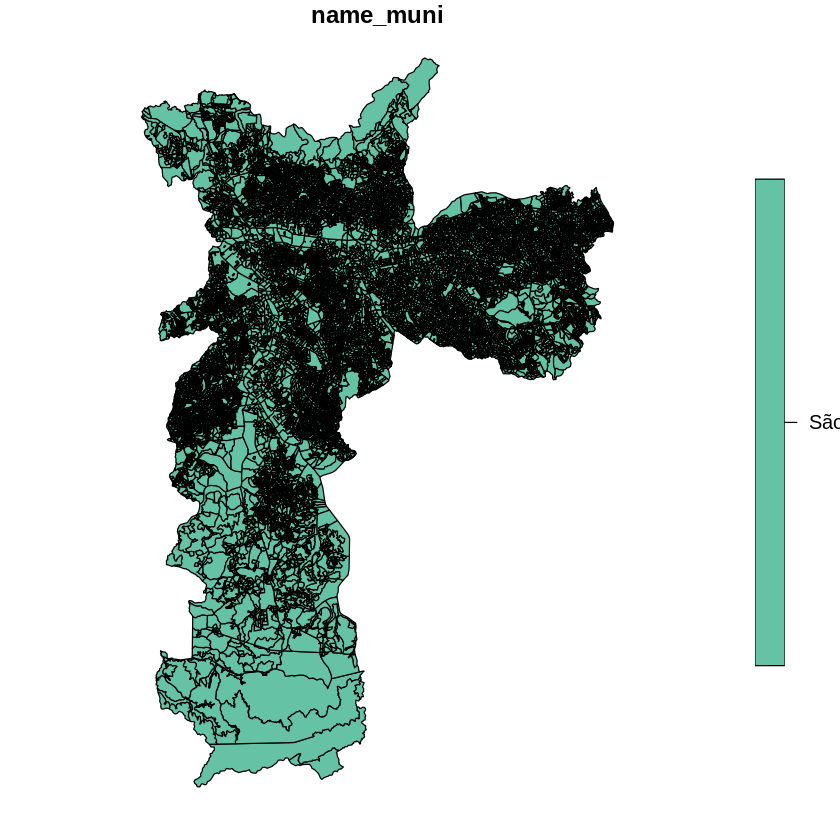

In [16]:
plot(setores_agregados %>% select(name_muni))

# 05_censo_escolar

In [2]:
open_file <- '../../../indice-mobilidade_dados/05_censo_escolar/2019/educacao_2019_filter_geocoded_gmaps.rds'
censo_escolar <- read_rds(open_file)

dim(censo_escolar)
head(censo_escolar)

[1] 11238    12

,co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio,endereco,uf,municipio,latitude,longitude
,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,13025120,2019,1302603,CMEI HUMBERTO DE ALENCAR CASTELO BRANCO,339,0,0,"R. 22, S/N CONJUNTO CASTELO BRA. PARQUE 10 DE NOVEMBRO. 69055-400 Manaus - AM.",AM,Manaus,-3.082092,-60.00977
2,13025180,2019,1302603,EM FRANCISCA GOMES MENDES,0,430,0,"R. BELO HORIZONTE, S/N COMPENSA. 69035-100 Manaus - AM.",AM,Manaus,-3.097571,-60.06163
3,13025562,2019,1302603,EM IMACULADA CONCEICAO,0,335,0,"R. A-10, S/N CONJ. AJURICABA. ALVORADA. 69046-120 Manaus - AM.",AM,Manaus,-3.064086,-60.04189
4,13025570,2019,1302603,EM JOSE CARLOS MARTINS MESTRINHO,104,264,0,"R. DR. THOMAS, S/N N S DAS GRACAS. NOSSA SENHORA DAS GRACAS. 69053-035 Manaus - AM.",AM,Manaus,-3.099687,-60.01743
5,13025767,2019,1302603,CENTRO EDUCACIONAL ARTHUR VIRGILIO FILHO,0,0,1066,"RUA NOSSA SENHORA DE FATIMA, 69 SANTA ETELVINA. 69059-420 Manaus - AM.",AM,Manaus,-2.986623,-60.00981
6,13025953,2019,1302603,ESC MUL SAO JOSE,0,413,0,"AV. OSCAR BOREL, 575 LOTE 25 QUADRA 93. COMPENSA. 69035-230 Manaus - AM.",AM,Manaus,-3.109485,-60.06049


In [5]:
# censo_escolar %>% dplyr::select(municipio) %>% distinct()
censo_escolar %>% filter(municipio == 'Marechal Deodoro' | municipio == 'Rio Largo' | is.na(municipio))

co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio,endereco,uf,municipio,latitude,longitude
<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
26121875,2019,2611606,ESCOLA ESTACIO COIMBRA,0,116,14,NA,NA,NA,-8.047922,-34.88150
27036731,2019,2704302,ESCOLA ESTADUAL JOSE CORREIA DA SILVA TITARA,0,0,193,"RUA DO ANTIGO CAJUEIRO, SN 1ª GERE. MASSAGUEIRA. 57160-000 Marechal Deodoro - AL.",AL,Marechal Deodoro,-9.743091,-35.84360
27038629,2019,2704302,ESCOLA ESTADUAL ROSALVO RIBEIRO,0,66,171,"CONJUNTO RESIDENCIAL JARBAS OITICICA, S/N QUADRA G -1. MATA DO ROLO. 57100-000 Rio Largo - AL.",AL,Rio Largo,-9.473334,-35.80872
32041330,2019,3205309,CMEI SANTA RITA DE CASSIA,246,0,0,NA,NA,NA,-20.297630,-40.30567
32079346,2019,3205309,CMEI THEODORO FAE,178,0,0,NA,NA,NA,-20.295794,-40.30943
35054951,2019,3550308,EMEF TAUNAY VISC DE,0,70,0,NA,NA,NA,-23.603930,-46.51497
35282376,2019,3550308,EMEF CASARAO,0,296,0,NA,NA,NA,-23.613100,-46.72284
41376978,2019,4106902,PIPA ENCANTADA CEI - HOSP DE CLINICAS - UFPR,145,0,0,NA,NA,NA,-25.423323,-49.26295


# 06_cnes_saude

In [2]:
open_file <- '../../../indice-mobilidade_dados/06_cnes_saude/2019/saude_2019_filter_geocode_revisto_gmaps_duas_etapas.rds'
censo_escolar <- read_rds(open_file)

dim(censo_escolar)
head(censo_escolar)

[1] 6761   91

CO_UNIDADE,IBGE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,NO_BAIRRO,CO_CEP,CO_REGIAO_SAUDE,CO_MICRO_REGIAO,CO_DISTRITO_SANITARIO,CO_DISTRITO_ADMINISTRATIVO,NU_TELEFONE,NU_FAX,NO_EMAIL,NU_CPF,NU_CNPJ,CO_ATIVIDADE,CO_CLIENTELA,NU_ALVARA,DT_EXPEDICAO,TP_ORGAO_EXPEDIDOR,DT_VAL_LIC_SANI,TP_LIC_SANI,TP_UNIDADE,CO_TURNO_ATENDIMENTO,CO_ESTADO_GESTOR,CO_MUNICIPIO_GESTOR,"TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')",CO_USUARIO,CO_CPFDIRETORCLN,REG_DIRETORCLN,ST_ADESAO_FILANTROP,CO_MOTIVO_DESAB,NO_URL,NU_LATITUDE,NU_LONGITUDE,"TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')",NO_USUARIO_GEO,CO_NATUREZA_JUR,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,CO_TIPO_UNIDADE,DS_TIPO_UNIDADE,CO_GESTAO_00,CO_GESTAO_01,CO_GESTAO_02,CO_GESTAO_03,CO_GESTAO_04,CO_GESTAO_05,CO_GESTAO_06,TP_PROG_0,TP_PROG_1,TP_PROG_2,CO_CONVENIO_01,CO_CONVENIO_02,CO_CONVENIO_03,CO_CONVENIO_04,CO_CONVENIO_05,CO_CONVENIO_06,CO_CONVENIO_07,CO_ATENDIMENTO_PRESTADO_01,CO_ATENDIMENTO_PRESTADO_02,CO_ATENDIMENTO_PRESTADO_03,CO_ATENDIMENTO_PRESTADO_04,CO_ATENDIMENTO_PRESTADO_05,CO_ATENDIMENTO_PRESTADO_06,CO_ATENDIMENTO_PRESTADO_07,health_low,health_med,health_high,latitude,longitude,latlong_id,rev_latlong,end_geocode,gmaps_type,gmaps_loctype,gmaps_address
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
2611607810032,261160,7810032,NA,3,1,FARIAS ANALISES CLINICAS EIRELI,FARIAS ANALISES CLINICAS,AVENIDA NORTE MIGUEL ARRAES DE ALENCAR,2535,NA,ENCRUZILHADA,52041080,1,1,02,NA,NA,NA,erikacfarias@laboaratorio.ciac.com.br,NA,22235187000145,04,03,0705340117,18-fev-2019 00:00:00,2,18-fev-2020 00:00:00,1,36,03,26,261160,30/12/2019,FLAVIA,07663846400,0140,NA,NA,NA,-8.041001,-34.88614,30/12/2019,FLAVIA,2305,N,NA,S,NA,M,04/09/2015,018,002,S,36,CLINICA/CENTRO DE ESPECIALIDADE,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,-8.0410008,-34.886136,-8.0410008-34.886136,0,NA,NA,NA,NA
1302607695667,130260,7695667,NA,3,1,I S DE SOUZA,AMAZON CLINICAL CENTER,R BERNARDO MICHILES,1296,SALA 5 2 ANDAR,PETROPOLIS,69067000,001,NA,NA,NA,92 33467384,NA,amazonclinical@gmail.com,NA,13696457000124,04,NA,NA,NA,NA,NA,NA,60,NA,13,130260,27/10/2017,AMAZON,43942040204,AM-011527-0,NA,04,NA,NA,NA,NA,NA,2062,S,NA,S,NA,E,13/04/2015,000,022,NA,NA,NA,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NA,NA,NANA,0,NA,NA,NA,NA
2304409526293,230440,9526293,04885197000144,3,3,SECRETARIA MUNICIPAL DA SAUDE,UPA UNIDADE DE PRONTO ATENDIMENTO EDSON QUEIROZ,AVENIDA CONTORNO,S/N,ATRAS DA UNIFOR,EDSON QUEIROZ,60540272,NA,NA,0006,NA,35232600,NA,patriciatbraun@gmail.com,NA,NA,04,01,NA,NA,NA,NA,NA,73,06,23,230440,29/11/2019,MILENA,01652395300,NA,NA,NA,NA,-3.768284,-38.47335,12/08/2019,FGALDINO,1031,S,NA,S,NA,M,17/06/2018,008,007,NA,73,PRONTO ATENDIMENTO,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-3.768284,-38.473346,-3.768284-38.473346,0,NA,NA,NA,NA
3106207774729,310620,7774729,NA,3,1,CENTRO DE IMAGEM DIAGNOSTICOS S A,AXIAL CENTRO DE IMAGEM DIAGNOSTICOS FILIAL MINAS SHOPPING,AVENIDA CRISTIANO MACHADO,4000,LOJA 801,UNIAO,31160900,NA,NA,NA,NA,(31) 3237-1212,32371-1228,contato@bhlegalbrasil.com.br,NA,42771949002189,04,03,PROCESSO 108794,NA,NA,NA,NA,39,04,31,310620,25/01/2020,BHLEGAL,90999410644,28481,NA,NA,NA,-19.875696,-43.92458,25/01/2020,BHLEGAL,2046,N,NA,S,NA,M,21/07/2015,018,002,S,NA,NA,0,0,1,0,0,0,0,0,1,0,1,1,0

# 07_rais_empregos

In [19]:
open_file <- '../../../indice-mobilidade_dados/07_rais_empregos/Lote1/Lote1.gpkg'
rais_empregos <- read_sf(open_file)

dim(rais_empregos)
head(rais_empregos)

[1] 383897     13

Qtd_Vínculos_Ativos,Ind_Simples,Município,Natureza_Jurídica,F0_Subclasse,IBGE_Subsetor,CEP_Estab,LOTE,Long,Lat,Cod_Proc,Comp_Cep,Shape
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<POINT [°]>
1,1,317020,2305,4321500,15,38400683,1,-48.27027,-18.90504,3,8,POINT (-48.27027 -18.90504)
4,1,317020,2305,1412602,11,38411276,1,-48.26761,-18.93673,1,8,POINT (-48.26761 -18.93673)
1,1,317020,2062,4781400,16,38414348,1,NA,NA,4,8,POINT EMPTY
2,0,317020,2135,4732600,16,38408353,1,-48.22769,-18.93195,1,8,POINT (-48.22769 -18.93195)
1,0,317020,2062,6619399,18,38400142,1,-48.28004,-18.91917,1,8,POINT (-48.28004 -18.91917)
3,0,317020,2062,8630501,22,38400606,1,NA,NA,4,8,POINT EMPTY


# 08_cras_assist_social

In [20]:
open_file <- '../../../indice-mobilidade_dados/08_cras_assist_social/2019/cras_2019_geocoded.rds'
cras_assist_social <- read_rds(open_file)

dim(cras_assist_social)
head(cras_assist_social)

[1] 433  21

code_cras,code_muni,name_suas,tp_log,logradouro,numero,bairro,cep,code_uf,email,telefone,open_date,lat_suas,lon_suas,cad_unico,name_muni,abrev_estado,endereco,lon,lat,check
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
13026002569,1302603,CRAS CIDADE NOVA,Avenida,"C, QD 67",46,CIDADE NOVA,69097748,13,cras.cidadenova@pmm.am.gov.br,9236363849,01/06/2004,-3.013.061.766.867.960,-59.970.860.481.054.100,Sim,Manaus,AM,"AVENIDA C, QD 67, 46",-59.97086,-3.013062,1
13026002579,1302603,CRAS ALFREDO NASCIMENTO,Rua,8,13,ALFREDO NASCIMENTO,69099435,13,cras.alfredonascimento@pmm.am.gov.br,9236464857,01/03/2007,-3.014.891.255.781.800,-5.995.288.610.458.370,Sim,Manaus,AM,"RUA 8, 13",-59.95289,-3.014891,1
13026002583,1302603,CRAS BETÂNIA,Rua,Sao Lazaro,26,BETÂNIA,69073091,13,cras.betania@pmm.am.gov.br,9232377678,01/09/2005,-31.327.172.123.425.700,-59.995.458.126.068.100,Sim,Manaus,AM,"RUA SAO LAZARO, 26",-59.99546,-3.132717,1
13026002585,1302603,CRAS Compensa I,Rua,Rua da industria,20,COMPENSA 1,69030070,13,cras.compensa1@pmm.am.gov.br,9236714767,01/09/2005,-31.030.530.413.866.400,-6.005.062.580.108.640,Sim,Manaus,AM,"RUA DA INDUSTRIA, 20",-60.05063,-3.103053,1
13026002589,1302603,CRAS CACHOEIRINHA,Avenida,CARVALHO LEAL,1151,CACHOEIRINHA,69065001,13,cras.cachoeirinha@pmm.am.gov.br,9236318607,27/03/2007,-3.125.645.770.996.360,-6.000.636.935.235.090,Sim,Manaus,AM,"AVENIDA CARVALHO LEAL, 1151",-60.00637,-3.125646,1
13026002590,1302603,CRAS ALVORADA I,Rua,ABÍLIO ALENCAR,S/N,ALVORADA I,69043324,13,cras.alvorada1@pmm.am.gov.br,9232389505,01/02/2006,-30.782.947.658.169.900,-6.003.666.758.537.290,Sim,Manaus,AM,"RUA ABÍLIO ALENCAR, S/N",-60.03667,-3.078295,1


# 09_maptiles_crop

In [21]:
open_file <- '../../../indice-mobilidade_dados/09_maptiles_crop/2019/maptile_crop_mapbox_spo_2019.rds'
maptiles_crop <- read_rds(open_file)

dim(maptiles_crop)
head(maptiles_crop)

[1] 697536      6

,x,y,red,green,blue,hex
,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
1,-5212661,-2675105,239,239,238,#EFEFEE
2,-5212585,-2675105,239,239,238,#EFEFEE
3,-5212508,-2675105,239,239,238,#EFEFEE
4,-5212432,-2675105,239,239,238,#EFEFEE
5,-5212356,-2675105,239,239,238,#EFEFEE
6,-5212279,-2675105,239,239,238,#EFEFEE


# 10_topografia

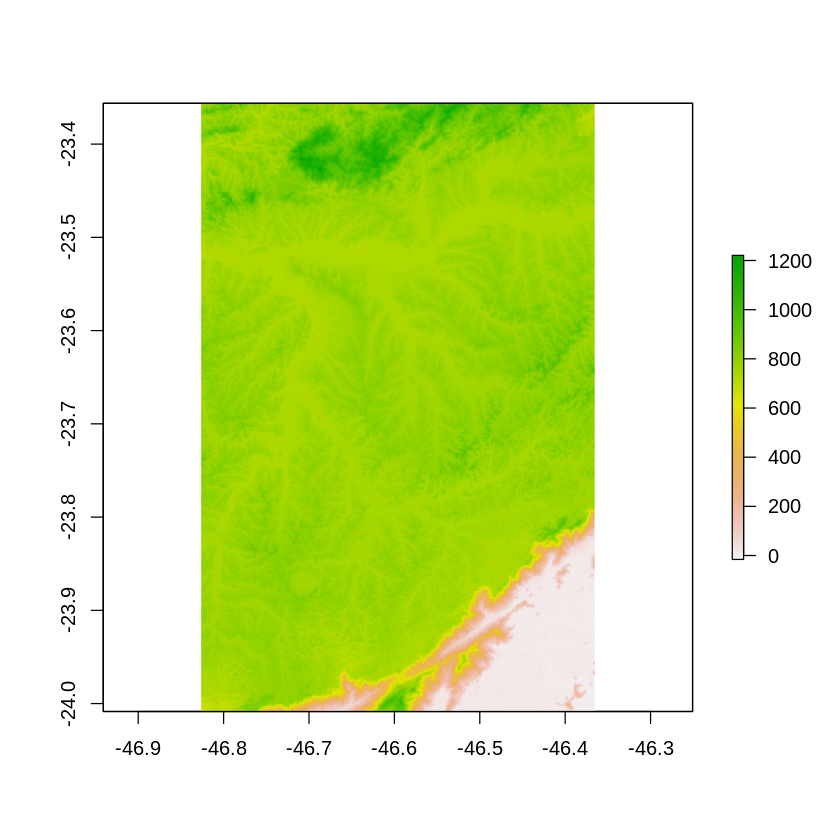

In [27]:
open_file <- '../../../indice-mobilidade_dados/10_topografia/spo/topografia_spo.tif'
topografia <- raster(open_file)

plot(topografia)

# 11_malha_viaria

In [21]:
open_file <- '../../../indice-mobilidade_dados/11_malha_viaria/2021/nat/nat_2019.osm.pbf'
malha_viaria <- read_sf(open_file, layer = 'lines')

head(malha_viaria)

osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<LINESTRING [°]>
11293542,NA,NA,NA,NA,NA,NA,0,NA,LINESTRING (-35.19464 -5.75...
22674738,Avenida Senador Dinarte de Medeiros Mariz,primary,NA,NA,NA,NA,7,"""alt_name""=>""Via Costeira"",""lanes""=>""2"",""maxspeed""=>""70"",""oneway""=>""yes"",""ref""=>""RN-301""",LINESTRING (-35.1857 -5.792...
22674771,Avenida Presidente Café Filho,primary,NA,NA,NA,NA,7,"""lanes""=>""4"",""oneway""=>""no"",""postal_code""=>""59015-100"",""surface""=>""asphalt""",LINESTRING (-35.19208 -5.78...
27361703,Rua Desembargador Dionísio Filgueira,secondary,NA,NA,NA,NA,6,"""lanes""=>""2"",""oneway""=>""yes""",LINESTRING (-35.19367 -5.78...
27361707,Avenida Afonso Pena,secondary,NA,NA,NA,NA,6,"""lanes""=>""2"",""oneway""=>""yes""",LINESTRING (-35.19543 -5.78...
27362077,NA,primary_link,NA,NA,NA,NA,7,"""lanes""=>""1"",""oneway""=>""yes""",LINESTRING (-35.19523 -5.78...


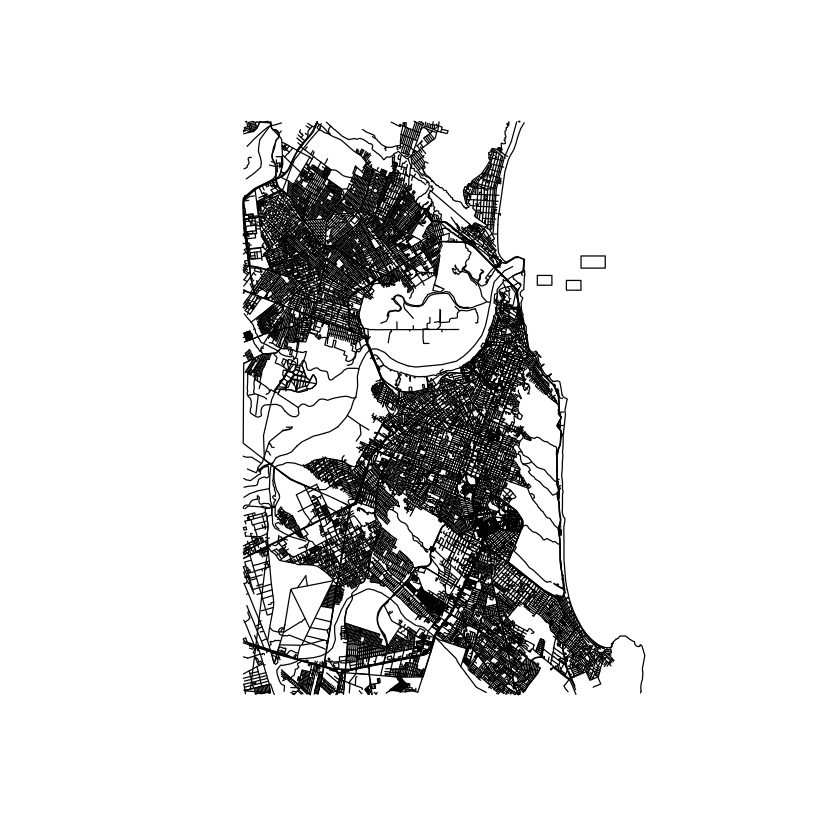

In [22]:
plot(malha_viaria$geometry)

# 12_hex_municipios

In [ ]:
# Município - sigla_munis - Resolução - num_hexágonos
# Osasco - oco - 8 - 88
# Vitória - vta - 8 - 130
# Natal - nat - 8 - 190
# João Pessoa - jpa - 8 - 251
# Santo André - sne - 8 - 256
# Recife - rec - 8 - 260
# Fortaleza - for - 8 - 363
# Belo Horizonte - bho - 8 - 436
# Maceió - mac - 8 - 609
# Curitiba - cur - 8 - 634
# Salvador - sal - 8 - 838
# Campinas - cam - 8 - 1.092
# São José dos Campos - sjc - 8 - 1.517
# Teresina - tsa - 8 - 1.647
# Rio de Janeiro - rio - 8 - 1.691
# São Paulo - spo - 8 - 2.154
# Londrina - lda - 8 - 2.383
# Uberlândia - ula - 8 - 5.475
# Goiania - goi - 8 - 8.861
# Campo Grande - cgr - 8 - 11.477
# Manaus - man - 8 - 15.484

In [3]:
open_file <- '../../../indice-mobilidade_dados/12_hex_municipios/2019/hex_nat_07_2019.rds'
hex_municipios <- read_rds(open_file)

dim(hex_municipios)
head(hex_municipios)

[1] 46  6

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,id_hex,h3_resolution,sigla_muni,geometry,ponto_viario,centroide
,<chr>,<int>,<chr>,<POLYGON [°]>,<POINT [°]>,<POINT [°]>
1,87818a59effffff,7,nat,POLYGON ((-35.27031 -5.7655...,POINT (-35.27554 -5.753057),POINT (-35.27709 -5.753537)
2,87819d2cbffffff,7,nat,POLYGON ((-35.20881 -5.8258...,POINT (-35.21528 -5.813563),POINT (-35.21559 -5.813836)
3,878199963ffffff,7,nat,POLYGON ((-35.18754 -5.7661...,POINT (-35.20277 -5.755843),POINT (-35.19432 -5.754149)
4,87818a593ffffff,7,nat,POLYGON ((-35.24973 -5.7776...,POINT (-35.25647 -5.766063),POINT (-35.25651 -5.76566)
5,87819996bffffff,7,nat,POLYGON ((-35.22845 -5.7179...,POINT (-35.23587 -5.705699),POINT (-35.23523 -5.70597)
6,87818a4b6ffffff,7,nat,POLYGON ((-35.24902 -5.7058...,POINT (0 0),POINT (-35.25581 -5.693845)


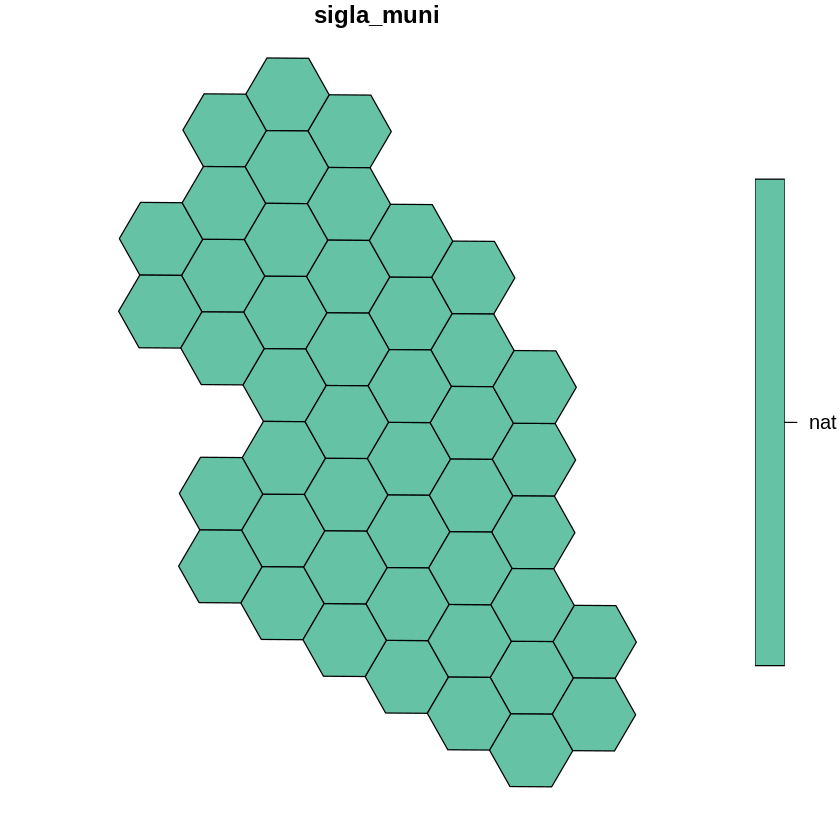

In [4]:
plot(hex_municipios %>% dplyr::select(sigla_muni))

# 13_grade_municipio_com_renda_cor

In [9]:
open_file <- '../../../indice-mobilidade_dados/13_grade_municipio_com_renda_cor/2019/grade_renda_cor_oco_2019.rds'
grade_muni_renda_cor <- read_rds(open_file)

dim(grade_muni_renda_cor)
head(grade_muni_renda_cor)

[1] 5279   17

id_grade,pop_total,pop_mulheres,pop_homens,renda,cor_branca,cor_amarela,cor_indigena,cor_negra,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POLYGON [°]>
494,10.800806,5.574610,5.226197,11521.004,7.366339,0.18948783,0.09474392,3.150235,0.3552897,1.1842989,0.7105794,1.0777120,2.427813,4.381906,0.6632074,POLYGON ((-46.79213 -23.552...
495,222.865546,119.261383,103.604163,237726.225,151.998212,3.90992186,1.95496093,65.002451,7.3311035,24.4370116,14.6622070,22.2376806,50.095874,90.416943,13.6847265,POLYGON ((-46.79213 -23.552...
499,10.307027,5.470068,4.836959,10994.300,7.029573,0.18082503,0.09041252,3.006216,0.3390469,1.1301565,0.6780939,1.0284424,2.316821,4.181579,0.6328876,POLYGON ((-46.79213 -23.552...
500,477.728191,249.721554,228.006636,509583.115,325.819007,8.38119633,4.19059816,139.337389,15.7147431,52.3824770,31.4294862,47.6680541,107.384078,193.815165,29.3341871,POLYGON ((-46.79215 -23.552...
505,5.033081,2.698535,2.334546,5368.687,3.432649,0.08829967,0.04414983,1.467982,0.1655619,0.5518729,0.3311237,0.5022043,1.131339,2.041930,0.3090488,POLYGON ((-46.79157 -23.550...
729,18.479671,9.991915,8.487756,19711.895,12.603460,0.32420475,0.16210237,5.389904,0.6078839,2.0262797,1.2157678,1.8439145,4.153873,7.497235,1.1347166,POLYGON ((-46.79018 -23.552...


In [28]:
sum(grade_muni_renda_cor$pop_total, na.rm = TRUE)

[1] 638282.4

In [51]:
grade_muni_renda_cor %>% 
    st_set_geometry(NULL) %>% 
    dplyr::select(matches('cor_')) %>% 
    colSums(na.rm = TRUE) 

cor_branca  cor_amarela cor_indigena    cor_negra 
 375555.8866    6693.7473     518.2639  249246.5811

In [48]:
grade_muni_renda_cor %>% 
    st_set_geometry(NULL) %>% 
    dplyr::select(matches('cor_')) %>% 
    summarize_all(na.rm = TRUE, sum)  %>% 
    mutate(sum = rowSums(.))

cor_branca,cor_amarela,cor_indigena,cor_negra,sum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
375555.9,6693.747,518.2639,249246.6,632014.5


In [49]:
grade_muni_renda_cor %>% 
    st_set_geometry(NULL) %>% 
    summarize(across(
        matches('cor_'),
        sum,
        na.rm = TRUE
    )) %>% 
    mutate(sum = rowSums(.))

cor_branca,cor_amarela,cor_indigena,cor_negra,sum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
375555.9,6693.747,518.2639,249246.6,632014.5


In [29]:
sum(grade_muni_renda_cor$pop_homens, na.rm = TRUE) + sum(grade_muni_renda_cor$pop_mulheres, na.rm = TRUE)

[1] 638282.4

In [30]:
sum(grade_muni_renda_cor$cor_branca, na.rm = TRUE) + sum(grade_muni_renda_cor$cor_amarela, na.rm = TRUE) + sum(grade_muni_renda_cor$cor_indigena, na.rm = TRUE) + sum(grade_muni_renda_cor$cor_negra, na.rm = TRUE)

[1] 632014.5

# 14_hex_agregados

In [10]:
open_file <- '../../../indice-mobilidade_dados/14_hex_agregados/2019/hex_agregado_oco_08_2019.rds'
hex_agregados <- read_rds(open_file)

dim(hex_agregados)
head(hex_agregados)

[1] 88 37

id_hex,h3_resolution,geometry,sigla_muni,cor_branca,cor_amarela,cor_indigena,cor_negra,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,pop_total,pop_homens,pop_mulheres,renda_total,renda_capita,quintil,decil,empregos_total,saude_total,saude_baixa,saude_media,saude_alta,edu_infantil,edu_fundamental,edu_medio,edu_total,mat_infantil,mat_fundamental,mat_medio,mat_total,cras_total,muni
<chr>,<int>,<POLYGON [°]>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
88a8103b53fffff,8,POLYGON ((-46.76182 -23.530...,oco,1385,16,2,418,106.8168,217.6201,95.56582,192.5634,457.5887,626.4415,125.8515,2226,1073,1155,2034087,913.7857,4,8,3652,0,0,0,0,0,1,1,1,0,446,201,647,0,oco
88a8100597fffff,8,POLYGON ((-46.77495 -23.560...,oco,3945,78,0,1147,291.6834,631.9592,278.45171,526.7287,1311.9355,1825.9679,311.5935,5192,2544,2641,6098209,1174.5395,5,10,574,1,1,1,0,2,1,0,3,445,692,0,1137,0,oco
88a8103a1dfffff,8,POLYGON ((-46.8138 -23.5292...,oco,2637,53,10,868,249.2955,419.0312,201.52970,323.6219,956.8821,1250.9899,163.8555,3675,1726,1950,4287824,1166.7549,5,9,1751,0,0,0,0,1,0,0,1,209,0,0,209,0,oco
88a8103a3dfffff,8,POLYGON ((-46.79209 -23.519...,oco,3368,52,0,1434,290.5186,528.3071,256.94020,545.0418,1187.5657,1785.4221,276.1978,4873,2218,2651,6033713,1238.1928,5,10,1424,1,1,1,0,0,1,0,1,0,1087,0,1087,0,oco
88a8103847fffff,8,POLYGON ((-46.77304 -23.495...,oco,1673,15,0,1878,306.8148,575.5703,274.88437,417.4267,940.4985,954.3076,98.7231,3569,1756,1817,1609923,451.0852,1,2,1053,0,0,0,0,1,1,0,1,165,422,0,587,0,oco
88a8103a5dfffff,8,POLYGON ((-46.81444 -23.550...,oco,3400,36,13,4212,863.8627,1364.2306,597.81368,771.9464,2147.7734,1792.0023,128.3210,7664,3725,3938,3031391,395.5364,1,1,453,0,0,0,0,2,1,0,3,421,769,0,1190,1,oco


# 15_otp

### 15 01_graphs (não visualizável)

Rede OTP/OSM para a cidade

### 15 02_points

Pontos de origem e destino para trip planner

In [15]:
open_file <- '../../../indice-mobilidade_dados/15_otp/02_points/2019/points_oco_08_2019.csv'
otp_points <- read_delim(open_file, delim = ',')

dim(otp_points)
head(otp_points)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  id_hex = col_character(),
  X = col_double(),
  Y = col_double()
)




[1] 88  3

id_hex,X,Y
<chr>,<dbl>,<dbl>
88a8103b53fffff,-46.76270,-23.52550
88a8100597fffff,-46.77583,-23.55559
88a8103a1dfffff,-46.81468,-23.52458
88a8103a3dfffff,-46.79298,-23.51486
88a8103847fffff,-46.77392,-23.49118
88a8103a5dfffff,-46.81532,-23.54605


### 15 03_output_ttmatrix

Matriz de tempo de viagem de um hexágono de origem para um de destino

In [16]:
open_file <- '../../../indice-mobilidade_dados/15_otp/03_output_ttmatrix/2019/ttmatrix_oco_08_2019_r5.csv'
otp_ttmatrix <- read_delim(open_file, delim = ',')

dim(otp_ttmatrix)
head(otp_ttmatrix)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  origin = col_character(),
  destination = col_character(),
  travel_time = col_double(),
  mode = col_character(),
  pico = col_double(),
  city = col_character(),
  ano = col_double()
)




[1] 7694    7

origin,destination,travel_time,mode,pico,city,ano
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
88a8103b53fffff,88a8103b53fffff,1,walk,1,oco,2019
88a8103b53fffff,88a8103b5bfffff,24,walk,1,oco,2019
88a8103b53fffff,88a8103b59fffff,45,walk,1,oco,2019
88a8103b53fffff,88a8103a2dfffff,29,walk,1,oco,2019
88a8103b53fffff,88a8103a21fffff,59,walk,1,oco,2019
88a8103b53fffff,88a8103a29fffff,59,walk,1,oco,2019


### 15 04_ttmatrix_fixed

Matriz de tempo de viagem corrigida, considerando alguns hexágonos que haviam ficado de fora

In [3]:
open_file <- '../../../indice-mobilidade_dados/14_hex_agregados/2019/hex_agregado_oco_08_2019.rds'
hex_agregados <- read_rds(open_file)

dim(hex_agregados)
head(hex_agregados)

[1] 88 37

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



id_hex,h3_resolution,geometry,sigla_muni,cor_branca,cor_amarela,cor_indigena,cor_negra,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,pop_total,pop_homens,pop_mulheres,renda_total,renda_capita,quintil,decil,empregos_total,saude_total,saude_baixa,saude_media,saude_alta,edu_infantil,edu_fundamental,edu_medio,edu_total,mat_infantil,mat_fundamental,mat_medio,mat_total,cras_total,muni
<chr>,<int>,<POLYGON [°]>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
88a8103b53fffff,8,POLYGON ((-46.76182 -23.530...,oco,1385,16,2,418,106.8168,217.6201,95.56582,192.5634,457.5887,626.4415,125.8515,2226,1073,1155,2034087,913.7857,4,8,3652,0,0,0,0,0,1,1,1,0,446,201,647,0,oco
88a8100597fffff,8,POLYGON ((-46.77495 -23.560...,oco,3945,78,0,1147,291.6834,631.9592,278.45171,526.7287,1311.9355,1825.9679,311.5935,5192,2544,2641,6098209,1174.5395,5,10,574,1,1,1,0,2,1,0,3,445,692,0,1137,0,oco
88a8103a1dfffff,8,POLYGON ((-46.8138 -23.5292...,oco,2637,53,10,868,249.2955,419.0312,201.52970,323.6219,956.8821,1250.9899,163.8555,3675,1726,1950,4287824,1166.7549,5,9,1751,0,0,0,0,1,0,0,1,209,0,0,209,0,oco
88a8103a3dfffff,8,POLYGON ((-46.79209 -23.519...,oco,3368,52,0,1434,290.5186,528.3071,256.94020,545.0418,1187.5657,1785.4221,276.1978,4873,2218,2651,6033713,1238.1928,5,10,1424,1,1,1,0,0,1,0,1,0,1087,0,1087,0,oco
88a8103847fffff,8,POLYGON ((-46.77304 -23.495...,oco,1673,15,0,1878,306.8148,575.5703,274.88437,417.4267,940.4985,954.3076,98.7231,3569,1756,1817,1609923,451.0852,1,2,1053,0,0,0,0,1,1,0,1,165,422,0,587,0,oco
88a8103a5dfffff,8,POLYGON ((-46.81444 -23.550...,oco,3400,36,13,4212,863.8627,1364.2306,597.81368,771.9464,2147.7734,1792.0023,128.3210,7664,3725,3938,3031391,395.5364,1,1,453,0,0,0,0,2,1,0,3,421,769,0,1190,1,oco


### 16_ttmatrix_motorizados

In [2]:
open_file <- '../../../indice-mobilidade_dados/16_ttmatrix_motorizados/2019/matriztp_nat_07_2019.rds'
ttmatrix_transit <- read_rds(open_file)

dim(ttmatrix_transit)
head(ttmatrix_transit)

[1] 768   9

,origem,destino,id_hex,pop_total,hex_dest,distancia,Time.Time,Distance.Distance,Status.status
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,-5.71778351380645+-35.2560406261025,-5.72959747625866+-35.2768544396567,878199969ffffff,16767,87818a59affffff,1,3140,4181,OK
2,-5.71778351380645+-35.2560406261025,-5.72990736769731+-35.2354643872981,878199969ffffff,16767,878199968ffffff,1,2213,2911,OK
3,-5.71778351380645+-35.2560406261025,-5.74172198970745+-35.2562764541414,878199969ffffff,16767,87819996dffffff,1,2533,3300,OK
4,-5.71778351380645+-35.2560406261025,-5.74202935496692+-35.2148891971292,878199969ffffff,16767,87819996effffff,2,2671,7455,OK
5,-5.71778351380645+-35.2560406261025,-5.75353676904173+-35.2770909870304,878199969ffffff,16767,87818a59effffff,2,4389,14938,OK
6,-5.71778351380645+-35.2560406261025,-5.75384463688493+-35.2356995120442,878199969ffffff,16767,87819996cffffff,2,2484,7906,OK


In [3]:
open_file <- '../../../indice-mobilidade_dados/16_ttmatrix_motorizados/base_teste_natal_automovel.csv'
ttmatrix_car <- read_delim(open_file, delim = ';')

dim(ttmatrix_car)
head(ttmatrix_car)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  id_origem = col_character(),
  id_destino = col_character(),
  dur_minutes = col_double()
)




[1] 568   3

id_origem,id_destino,dur_minutes
<chr>,<chr>,<dbl>
87818a592ffffff,878199965ffffff,0.100000
87818a592ffffff,878199969ffffff,14.900000
87818a593ffffff,87818a593ffffff,7.195658
87818a593ffffff,87818a594ffffff,26.050000
87818a593ffffff,87818a596ffffff,19.698889
87818a593ffffff,87818a59affffff,13.690909


In [7]:
ttmatrix_car %>% group_by(id_origem, id_destino) %>% tally() %>% arrange(-n) %>% head()

id_origem,id_destino,n
<chr>,<chr>,<int>
87818a592ffffff,878199965ffffff,1
87818a592ffffff,878199969ffffff,1
87818a593ffffff,87818a593ffffff,1
87818a593ffffff,87818a594ffffff,1
87818a593ffffff,87818a596ffffff,1
87818a593ffffff,87818a59affffff,1


### 17_acesso_oportunidades

In [3]:
open_file <- '../../../indice-mobilidade_dados/17_acesso_oportunidades/2019/acess_nat_07_2019.rds'
acesso_oportunidades <- read_rds(open_file)

dim(acesso_oportunidades)
head(acesso_oportunidades)

[1] 67 73

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.9.1-CAPI-1.14.2
and GEOS at installation 3.9.1dev-CAPI-1.14.1differ”
Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,origin,city,mode,pico,quintil,decil,CMATT15,CMAST15,CMASB15,CMASM15,CMASA15,CMAET15,CMAEI15,CMAEF15,CMAEM15,CMAMT15,CMAMI15,CMAMF15,CMAMM15,CMACT15,CMATT30,CMAST30,CMASB30,CMASM30,CMASA30,CMAET30,CMAEI30,CMAEF30,CMAEM30,CMAMT30,CMAMI30,CMAMF30,CMAMM30,CMACT30,CMPPT15,CMPPM15,CMPPW15,CMPPB15,CMPPA15,CMPPI15,CMPPN15,CMPI115,CMPI215,CMPI315,CMPI415,CMPI515,CMPI615,CMPI715,CMPPT30,CMPPM30,CMPPW30,CMPPB30,CMPPA30,CMPPI30,CMPPN30,CMPI130,CMPI230,CMPI330,CMPI430,CMPI530,CMPI630,CMPI730,TMIST,TMISB,TMISM,TMISA,TMIET,TMIEI,TMIEF,TMIEM,TMICT,geometry,ano
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POLYGON [°]>,<dbl>
1,87818a592ffffff,nat,bike,1,1,1,234931,289,178,261,82,289,85,191,62,111340,15747,64094,31499,13,239249,297,186,264,83,336,97,223,73,134998,18478,79477,37043,15,805326,377671,427613,352173,7672,761,437237,63230.22,109748.98,56913.18,93358.69,201133.3,232695.9,41362.34,962651,452805,509796,413916,9451,929,530782,77529.84593,134556.91232,69211.05245,112229.2076,241609.5855,274560.7372,46079.82188,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,POLYGON ((-35.22915 -5.7898...,2019
2,87818a592ffffff,nat,transit,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,526,225,301,303,0,0,219,34.85441,58.22417,28.19901,52.4951,150.3967,166.9184,34.57304,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,POLYGON ((-35.22915 -5.7898...,2019
3,87818a592ffffff,nat,walk,1,1,1,234959,289,178,261,82,290,85,192,62,111441,15747,64195,31499,13,234959,289,178,261,82,290,85,192,62,111441,15747,64195,31499,13,805955,377963,427950,352434,7675,761,437599,63281.41,109831.50,56954.24,93435.49,201294.9,232879.3,41395.42,805955,377963,427950,352434,7675,761,437599,63281.40911,109831.49989,56954.23934,93435.4908,201294.9010,232879.3317,41395.42172,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,POLYGON ((-35.22915 -5.7898...,2019
4,87818a593ffffff,nat,bike,1,3,6,44993,108,67,90,27,130,41,83,24,55199,8159,35776,11264,10,81597,135,86,109,35,227,74,147,40,93564,15259,59890,18415,14,432344,206625,225691,170552,4500,362,256243,39192.48,67164.66,33262.55,51443.18,110480.8,114433.7,15955.95,730566,348505,382029,290376,7947,686,428906,64989.02939,111498.72937,55471.36558,86744.2014,186447.6293,196185.5668,27072.27302,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,POLYGON ((-35.24973 -5.7776...,2019
5,87818a593ffffff,nat,transit,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8615,7,6,7,2,21,9,12,3,5003,1431,2890,682,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,62826,29575,33255,25640,565,39,36271,4972.07008,8749.70454,4562.49646,7239.5174,15375.2958,18044.1660,3596.67846,21.63333,21.63333,21.63333,21.63333,21.63333,21.63333,21.63333,21.63333,Inf,POLYGON ((-35.24973 -5.7776...,2019
6,87818a593ffffff,nat,walk,1,3,6,49932,115,74,93,27,174,55,113,34,74316,10724,47873,15719,13,49932,115,74,93,27,174,55,113,34,74316,10724,47873,15719,13,584883,279553,305298,230229,6159,521,347193,52837.19,90733.77,44882.64,69726.43,149792.6,155733.2,20771.64,584883,279553,305298,230229,6159,521,347193,52837.19292,90733.76760,44882.64244,69726.4295,149792.6157,155733.1543,20771.63861,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,POLYGON ((-35.24973 -5.7776...,2019
